In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# rating data

In [7]:
file_path = './dataset/ratings_small.csv'
ratings_data = pd.read_csv(file_path)

ratings_data.head(), ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


(   userId  movieId  rating   timestamp
 0       1       31     2.5  1260759144
 1       1     1029     3.0  1260759179
 2       1     1061     3.0  1260759182
 3       1     1129     2.0  1260759185
 4       1     1172     4.0  1260759205,
 None)

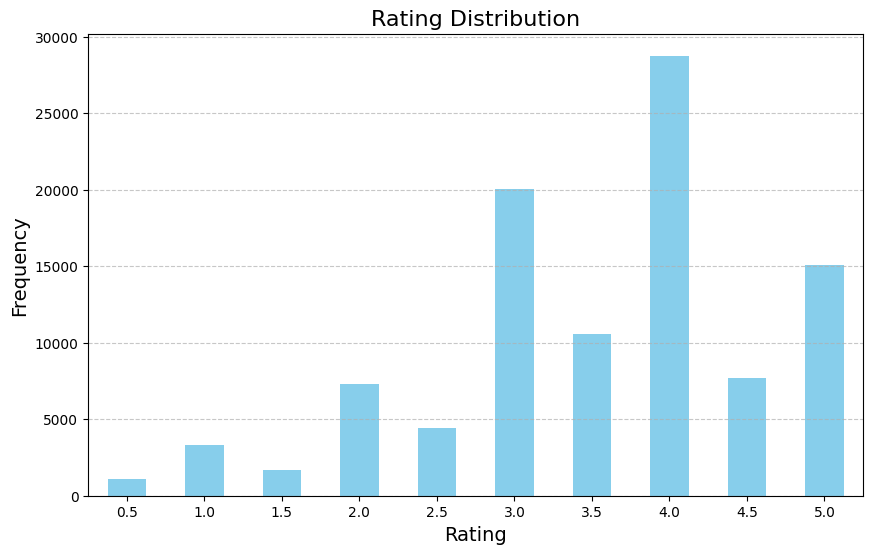

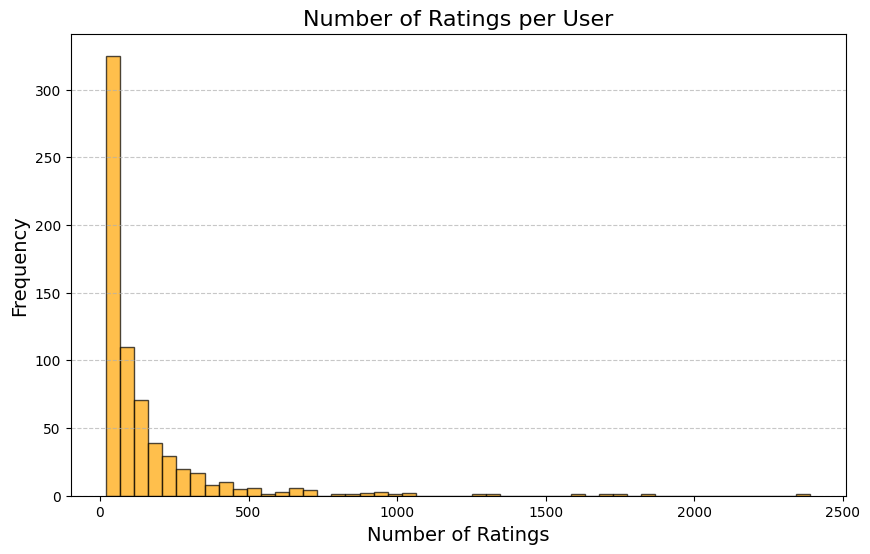

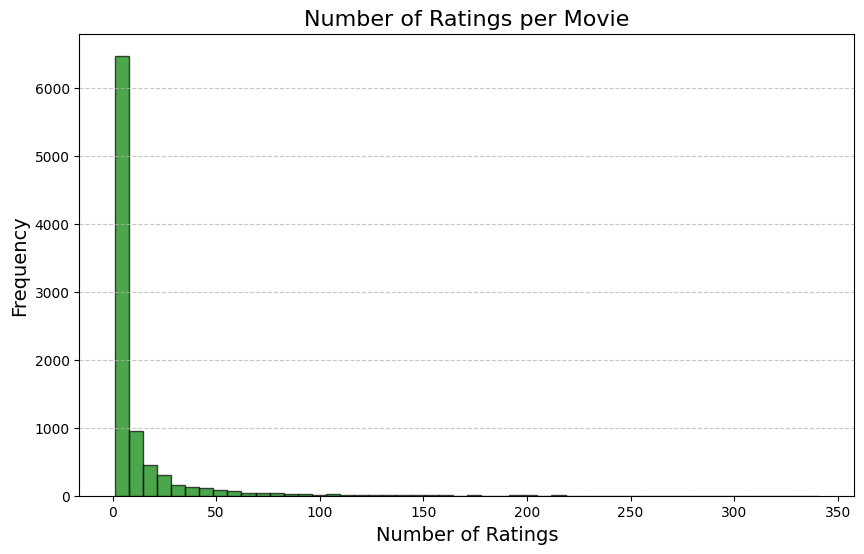

In [8]:
# Rating distribution
plt.figure(figsize=(10, 6))
ratings_data['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Number of ratings per user
user_ratings_count = ratings_data.groupby('userId').size()
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Number of Ratings per User', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Number of ratings per movie
movie_ratings_count = ratings_data.groupby('movieId').size()
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings_count, bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Number of Ratings per Movie', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# metadata

In [6]:
movies_metadata_path = './dataset/movies_metadata.csv'
movies_metadata = pd.read_csv(movies_metadata_path, low_memory=False)

movies_metadata.head(), movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

(   adult                              belongs_to_collection    budget   
 0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000  \
 1  False                                                NaN  65000000   
 2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
 3  False                                                NaN  16000000   
 4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
 
                                               genres   
 0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  \
 1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
 2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
 3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
 4                     [{'id': 35, 'name': 'Comedy'}]   
 
                                homepage     id    imdb_id original_language   
 0  http://toystory.disney.com/toy-story    862  tt0114709                en  \
 1                                   NaN   8844  t

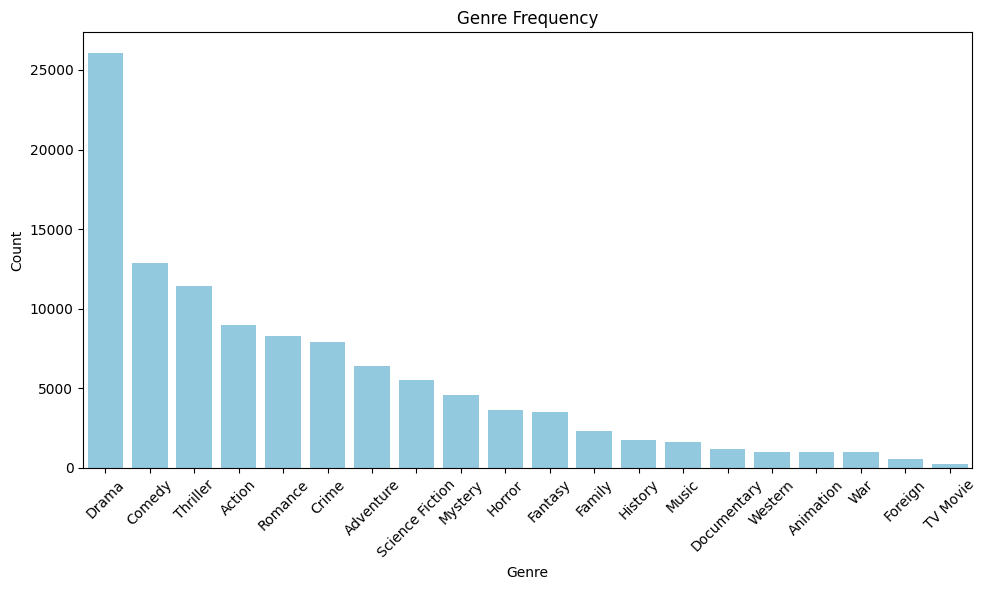

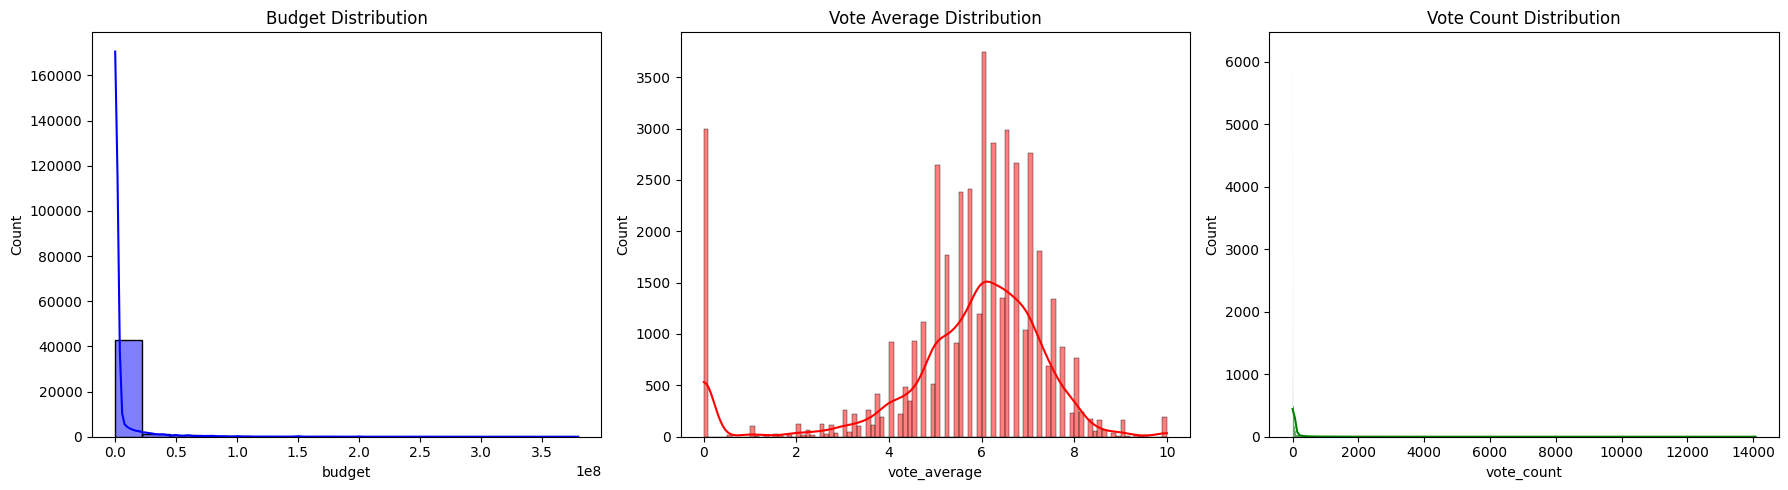

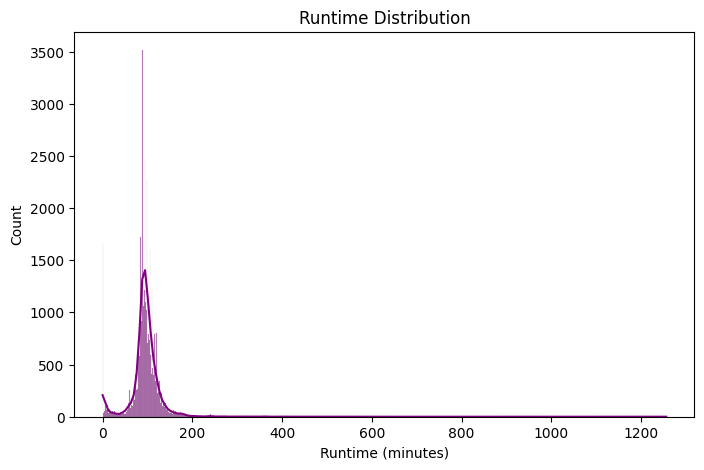

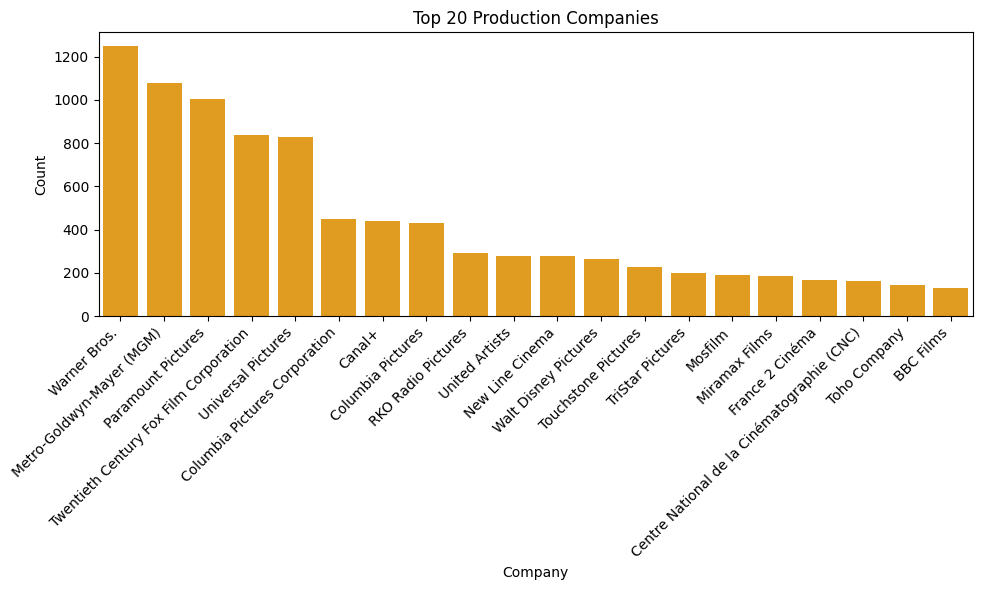

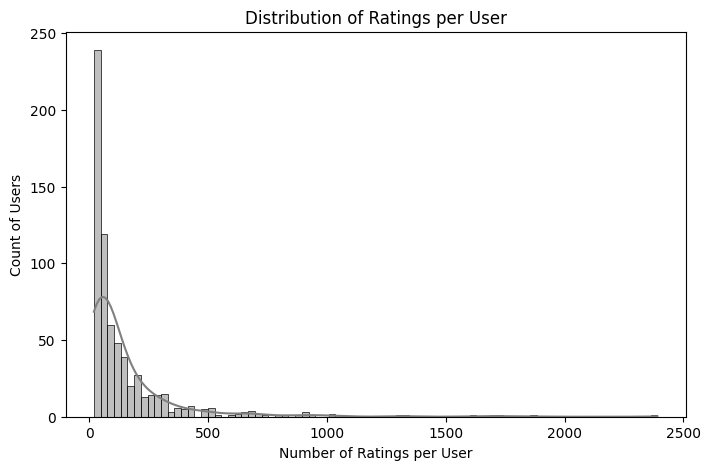

In [ ]:
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')

movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')

movies_metadata['runtime'] = movies_metadata['runtime'].fillna(0)

# Analyze runtime distribution
plt.figure(figsize=(10, 6))
plt.hist(movies_metadata['runtime'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Movie Runtime Distribution', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze vote_average distribution
plt.figure(figsize=(10, 6))
movies_metadata['vote_average'].dropna().plot(kind='hist', bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Average Vote Ratings Distribution', fontsize=16)
plt.xlabel('Average Vote', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze revenue distribution (log scale to handle skewness)
plt.figure(figsize=(10, 6))
movies_metadata[movies_metadata['revenue'] > 0]['revenue'].apply(lambda x: x if x > 0 else None).plot(kind='hist', bins=50, color='green', edgecolor='black', alpha=0.7, logy=True)
plt.title('Movie Revenue Distribution (Log Scale)', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Number of Movies (Log Scale)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

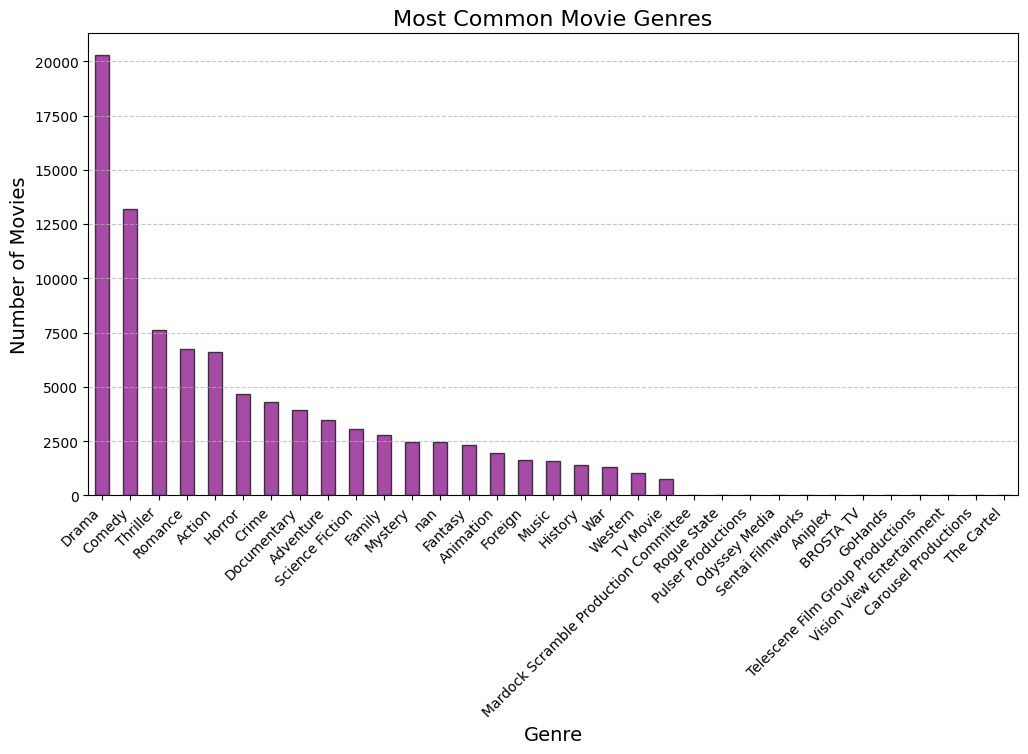

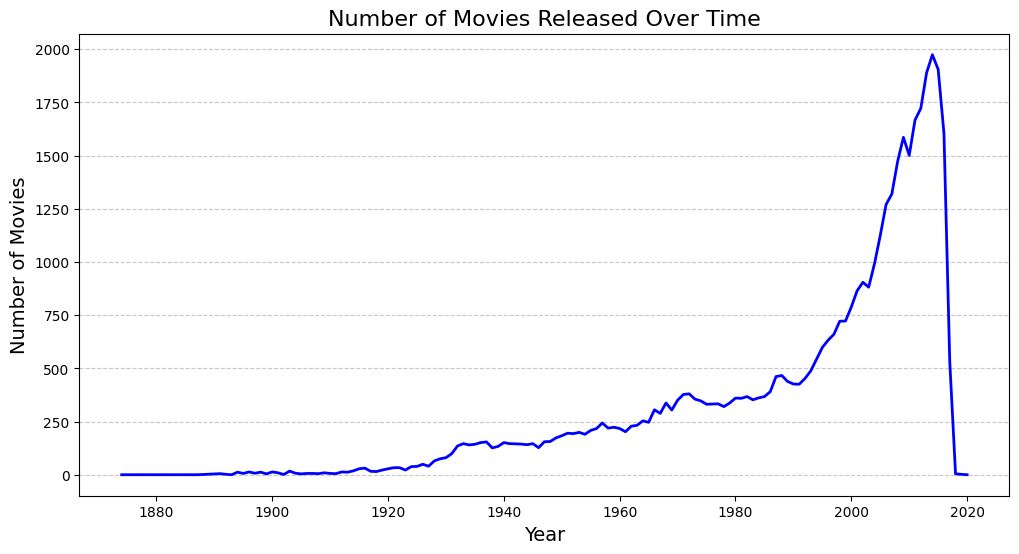

In [8]:
import ast
from collections import Counter

# Extract genres and count occurrences
def extract_genres(genres):
    try:
        return [genre['name'] for genre in ast.literal_eval(genres)]
    except (ValueError, SyntaxError):
        return []

movies_metadata['genres_list'] = movies_metadata['genres'].apply(extract_genres)

# Flatten genre list and count occurrences
all_genres = movies_metadata['genres_list'].explode()
genre_counts = Counter(all_genres)

# Plot most common genres
plt.figure(figsize=(12, 6))
pd.Series(genre_counts).sort_values(ascending=False).plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
plt.title('Most Common Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze release trends over time
release_year = movies_metadata['release_date'].dt.year.dropna()
plt.figure(figsize=(12, 6))
release_year.value_counts().sort_index().plot(kind='line', color='blue', linewidth=2)
plt.title('Number of Movies Released Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

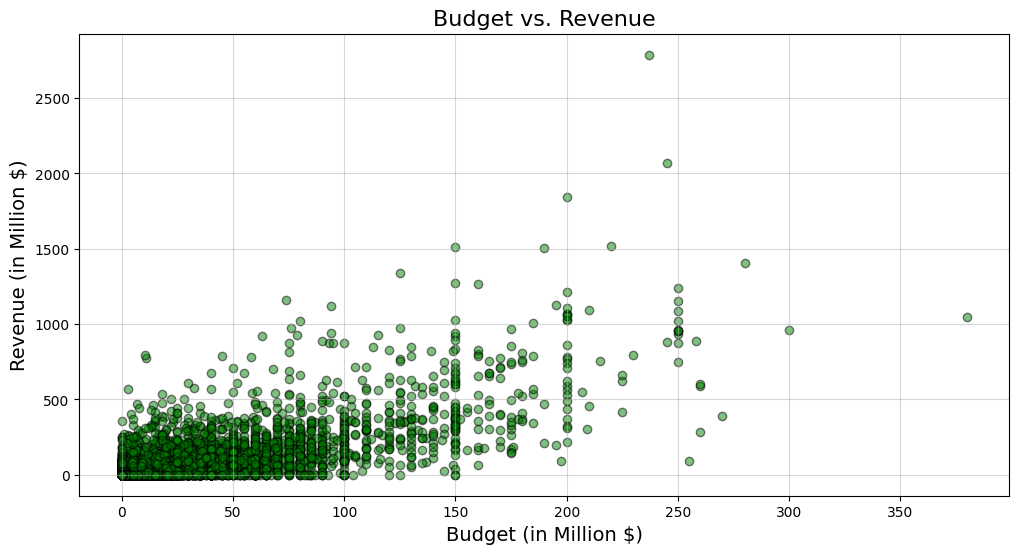

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(
    movies_metadata['budget'] / 1e6,  
    movies_metadata['revenue'] / 1e6, 
    alpha=0.5, color='green', edgecolor='black'
)
plt.title('Budget vs. Revenue', fontsize=16)
plt.xlabel('Budget (in Million $)', fontsize=14)
plt.ylabel('Revenue (in Million $)', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

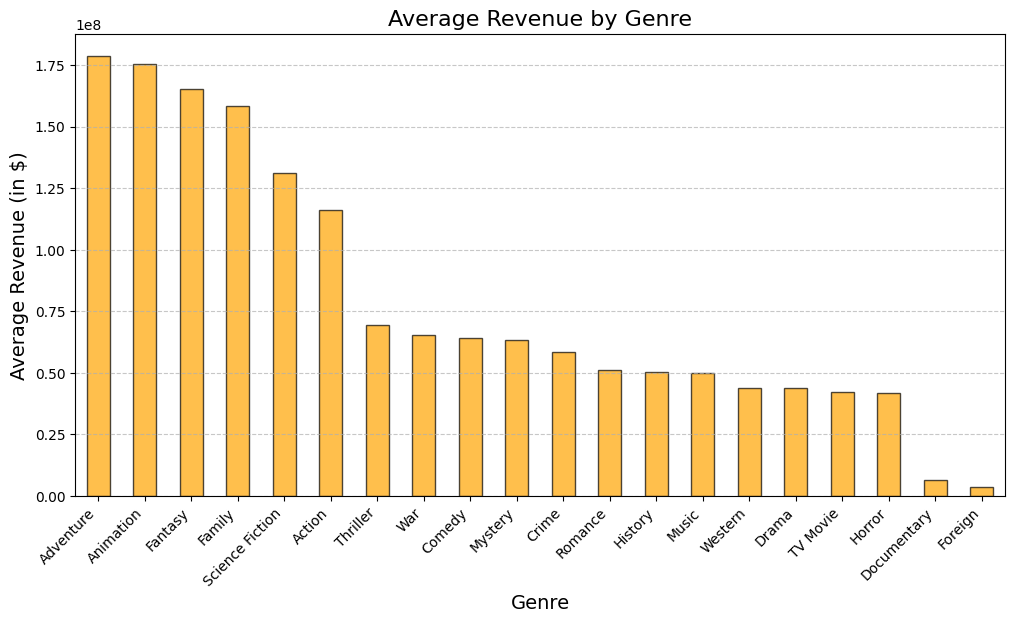

In [10]:
# Average revenue by genre
genre_revenues = movies_metadata.explode('genres_list')
genre_revenues = genre_revenues[genre_revenues['revenue'] > 0]  # Filter movies with revenue > 0
avg_revenue_by_genre = genre_revenues.groupby('genres_list')['revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_revenue_by_genre.plot(kind='bar', color='orange', edgecolor='black', alpha=0.7)
plt.title('Average Revenue by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Revenue (in $)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

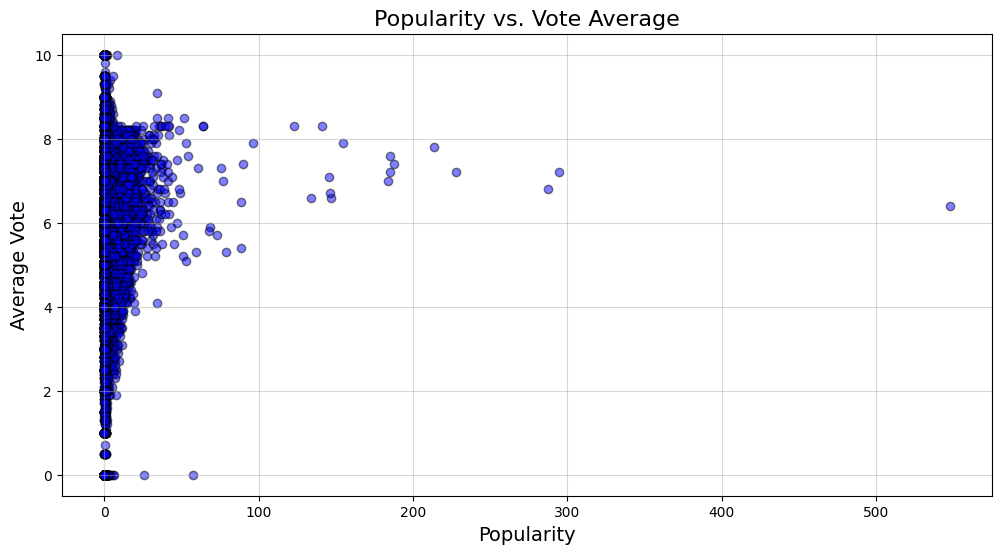

In [14]:
movies_metadata['popularity'] = pd.to_numeric(movies_metadata['popularity'], errors='coerce')
movies_metadata['vote_average'] = pd.to_numeric(movies_metadata['vote_average'], errors='coerce')

valid_data = movies_metadata.dropna(subset=['popularity', 'vote_average'])

plt.figure(figsize=(12, 6))
plt.scatter(
    valid_data['popularity'],
    valid_data['vote_average'],
    alpha=0.5, color='blue', edgecolor='black'
)
plt.title('Popularity vs. Vote Average', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Average Vote', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

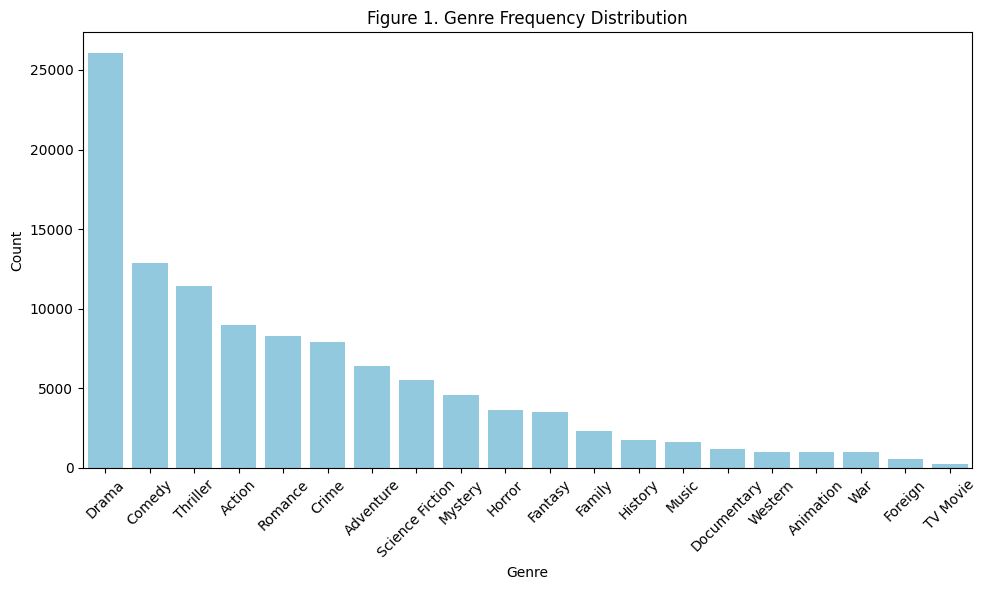

In [5]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

movies = pd.read_csv('./dataset/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('./dataset/ratings_small.csv')

# Basic preprocessing: filter valid IDs
movies = movies.dropna(subset=['id'])
movies = movies[movies['id'].apply(lambda x: str(x).isdigit())]
movies['id'] = movies['id'].astype(int)

merged = pd.merge(ratings, movies, left_on='movieId', right_on='id', how='inner')

def extract_genres(x):
    try:
        g_list = ast.literal_eval(x)
        return [g['name'] for g in g_list] if isinstance(g_list, list) else []
    except:
        return []

merged['genres_list'] = merged['genres'].apply(extract_genres)
all_genres = merged['genres_list'].explode().value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=all_genres.index, y=all_genres.values, color='skyblue')
plt.xticks(rotation=45)
plt.title('Figure 1. Genre Frequency Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

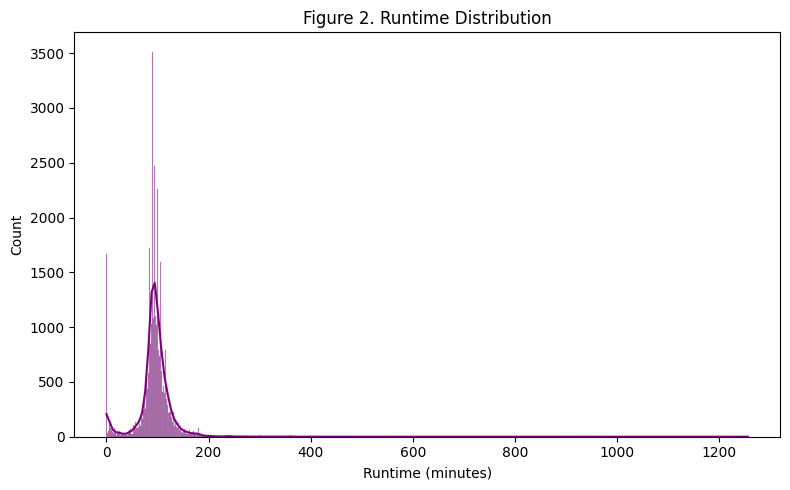

In [6]:
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')

plt.figure(figsize=(8,5))
sns.histplot(movies['runtime'].dropna(), kde=True, color='purple')
plt.title('Figure 2. Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()